**Дарья Касьяненко**

* Эксперт [Центра непрерывного образования](https://cs.hse.ru/dpo/) ФКН НИУ ВШЭ
* Академический руководитель онлайн-магистратуры «[Инженерия данных](https://www.hse.ru/ma/data-engineering/)»
* Старший преподаватель ФКН НИУ ВШЭ

<hr>

# День 3. Разведочный анализ данных (EDA)

In [ ]:
# !pip install seaborn matplotlib ### запустите, если вдруг следующая ячейка выдаст ошибку

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # библиотека для графиков
import seaborn as sns

df = pd.read_csv('dates.csv')

In [2]:
pd.set_option('display.max_columns', 52) # чтобы все колонки показывались в выводе

### Описание признаков

 * gender: пол
 * age: свой возраст
 * age_o: возраст партнера  
 * field: сфера занятий

**Раздел про важность различных качеств (нужно распределить между 5 категориями 100 баллов)**
 * pref_o_attractive: Насколько важна привлекательность?
 * pref_o_sinsere: Насколько важна искренность?
 * pref_o_intelligence: Насколько важен интеллект?
 * pref_o_funny: Насколько важно чувство юмора?
 * pref_o_ambitious: Насколько важна амбициозность?
 * pref_o_shared_interests: Насколько важно разделять одинаковые интересы?

**Как оценили друг друга на встрече (0-10)**
 * attractive_o: Оценка привлекательности (от партнера) в вечер встречи
 * sincere_o: Оценка искренности (от партнера) в вечер встречи
 * intelligence_o: Оценка интеллекта (от партнера) в вечер встречи
 * funny_o: Оценка чувства юмора (от партнера) в вечер встречи
 * ambitous_o: Оценка амбициозности (от партнера) в вечер встречи  
 * shared_interests_o: Оценка общих интересов (от партнера) в вечер встречи  
 * attractive: Оценка собственной привлекательности
 * sincere: Оценка собственной искренности   
 * intelligence: Оценка собственного интеллекта   
 * funny: Оценка собственного чувства юмора  
 * ambition: Оценка собственных амбиций
 * attractive_partner: Оценка привлекательности партнера в вечер встречи  
 * sincere_partner: Оценка искренности партнера в вечер встречи  
 * intelligence_partner: Оценка интеллекта партнера в вечер встречи   
 * funny_partner: Оценка чувства юмора партнера в вечер встречи   
 * ambition_partner: Оценка амбициозности партнера в вечер встречи   
 * shared_interests_partner: Оценка общих интересов партнера в вечер встречи  

**Оценка своих интересов в разных сферах (0-10)**
 * sports
 * tvsports  
 * exercise  
 * dining  
 * museums  
 * art  
 * hiking  
 * gaming  
 * clubbing  
 * reading  
 * tv  
 * theater  
 * movies  
 * concerts  
 * music  
 * shopping  
 * yoga   

**Оценка ожиданий от быстрого свидания**
 * expected_happy_with_sd_people: Насколько вы будете удовлетворены людьми, которых встретите на спид-дэйтинге? (0-10)
 * expected_num_interested_in_me: Из 20 людей, которых вы встретите на спид-дейтинге, как вы думаете, сколько будут заинтересованы пойти с вами на настоящее свидание?
 * expected_num_matches: Сколько взаимных симпатий вы ожидаете?

**Результаты быстрого свидания**
 * like: Понравился ли вам партнер?  
 * guess_prob_liked: Как вы думаете, вы понравились партнеру?
 * met: Вы уже встречались с этим партнером?
 * decision: Ваше решение
 * decision_o: Решение вашего партнера
 * match: Мэтч (да/нет)

In [3]:
df.head()

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
0,female,21,27,Law,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8,8.0,8.0,8,6.0,6,8,8,8,7,6,9,7,7,6,5,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,4,7.0,0,1,0,0
1,female,21,22,Law,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8,10.0,7.0,7,5.0,6,8,8,8,7,7,8,7,8,5,6,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,4,7.0,1,1,0,0
2,female,21,23,Law,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8,9.0,8.0,9,8.0,6,8,8,8,7,7,6,8,7,6,8,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,4,7.0,0,1,1,1
3,female,21,24,Law,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7,9.0,6.0,9,7.0,6,8,8,8,7,5,6,7,7,6,6,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,4,6.0,0,1,1,1
4,female,21,25,Law,50.0,0.0,30.0,10.0,0.0,10.0,7.0,7,8.0,8.0,7,7.0,6,8,8,8,7,4,9,7,4,6,4,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,4,6.0,0,0,1,0


### Проверяем на пропуски

In [4]:
df.isna().sum()

gender                           0
age                              0
age_o                            0
field                            0
pref_o_attractive                0
pref_o_sincere                   0
pref_o_intelligence              0
pref_o_funny                     0
pref_o_ambitious                 0
pref_o_shared_interests          0
attractive_o                     0
sinsere_o                        0
intelligence_o                   0
funny_o                          0
ambitous_o                       0
shared_interests_o               0
attractive                       0
sincere                          0
intelligence                     0
funny                            0
ambition                         0
attractive_partner               0
sincere_partner                  0
intelligence_partner             0
funny_partner                    0
ambition_partner                 0
shared_interests_partner         0
sports                           0
tvsports            

### Проверяем на дубликаты

In [5]:
df.duplicated().sum()

0

## Вглядываемся в данные

### Частотные таблицы

In [6]:
df['field'].value_counts()

field
Law                                      199
Social Work                               90
Chemistry                                 56
Psychology                                51
Business                                  48
Economics                                 37
Finance                                   36
Mba                                       33
Operations Research                       26
Film                                      23
Electrical Engineering                    18
Political Science                         17
Engineering                               16
Journalism                                15
Finance&Economics                         15
Business- Mba                             15
Marketing                                 15
Microbiology                              15
Elementary/Childhood Education [Ma]       15
Business [Mba]                            14
Medicine                                  14
Operations Research [Seas]                14
Educ

Нарисуем топ-5 сфер занятости!

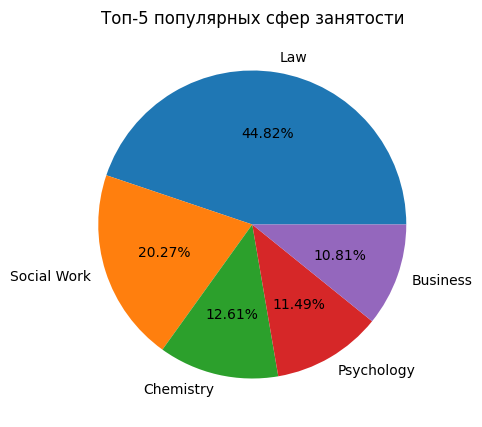

In [7]:
occupation = df['field'].value_counts()[:5]

fig = plt.figure(figsize=(7, 5)) # подготавливаем канву для графика

plt.pie(                         # из библиотеки plt достаем функцию pie – она отрисует круговую диаграмму
    occupation,                  # передаем данные для отрисовки
    labels=occupation.index,     # названия секторов – это индексы в полученной таблице (сферы деятельности)
    autopct="%.2f%%"             # добавляем показ процентов на секторах
    )

plt.title('Топ-5 популярных сфер занятости');  # добавляем заголовок

In [8]:
fig.savefig('pie.png') # сохраняем график

<hr>

### Задание

Найдите соотношение оценки своей привлекательности и оценки привлекательности от партнера.

<hr>

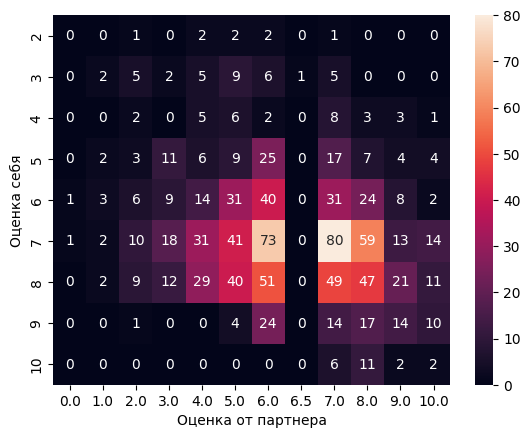

In [9]:
# сохраним в новый датафрейм полученную таблицу
attract = df[['attractive', 'attractive_o']].value_counts().unstack().fillna(0) # заменим пустоты на 0

# тепловая карта
s = sns.heatmap(attract, annot=True);
s.set(xlabel='Оценка от партнера', ylabel='Оценка себя');

<hr>

## Описательные статистики

* count - количество непустых значений
* mean - среднее значение
* std - стандартное отклонение – мера разброса в наборе числовых данных. Выражаясь простыми словами, насколько далеко от среднего арифметического (mean) находятся точки данных. Чем выше значение стандартного отклонения, тем более разбросаны значения в выборке. И наоборот, чем ниже значение стандартного отклонения, тем более плотно упакованы значения.
* min - минимальное значение
* 25% - 25% перцентиль (25% значений меньше этого значения, 75% больше)
* 50% - 50% перцентиль (медиана)
* 75% - 75% перцентиль (75% значений меньше этого значения, 25% больше)
* max - максимальное значение

In [10]:
df.describe() # описательные статистики для всех количественных переменных

,age,age_o,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.00000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,25.005725,24.818702,23.728235,16.971021,22.255887,17.325029,9.725792,10.333626,6.211355,7.17271,7.387405,6.296756,6.802481,5.423664,6.892176,8.158397,7.597328,8.317748,7.205153,6.191794,7.218511,7.438931,6.361641,6.799618,5.430344,6.248092,4.557252,5.978053,7.628817,6.814885,6.437023,5.102099,3.922710,6.100191,7.422710,5.591603,6.877863,8.062023,6.958969,7.710878,5.511450,4.133588,5.378817,5.760496,2.844466,6.218034,0.075382,0.422710,0.431298,0.177481
std,3.270365,3.180581,12.660571,7.450629,7.352106,6.666005,7.073420,6.763784,1.964935,1.73721,1.542834,2.065131,1.828908,2.168277,1.493320,1.384077,1.771598,1.001045,2.035711,1.910222,1.745771,1.508996,2.036894,1.800965,2.115327,2.644397,2.794551,2.455817,1.786773,1.957546,2.189199,2.579042,2.365532,2.178842,1.958436,2.485720,2.283692,1.585202,2.034853,1.899931,2.597821,2.696578,1.630245,4.954703,2.370152,1.858517,0.274766,0.494226,0.495494,0.382258
min,18.000000,18.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,22.000000,15.000000,10.000000,20.000000,10.832500,5.000000,5.000000,5.000000,6.00000,6.875000,5.000000,6.000000,4.000000,6.000000,8.000000,7.000000,8.000000,6.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,4.000000,2.000000,4.000000,6.000000,6.000000,5.000000,3.000000,2.000000,4.000000,6.000000,4.000000,5.000000,7.000000,6.000000,7.000000,4.000000,2.000000,5.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,25.000000,20.000000,18.000000,20.000000,18.180000,10.000000,10.000000,6.000000,7.00000,7.000000,6.000000,7.000000,5.000000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,5.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,5.000000,4.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,5.000000,3.000000,5.000000,4.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,27.000000,27.000000,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000,8.000000,8.00000,8.000000,8.000000,8.000000,7.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,7.000000,8.000000,9.000000,8.000000,8.000000,7.000000,6.000000,8.000000,9.000000,8.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000,7.000000,8.000000,4.000000,7.000000,0.000000,1.000000,1.000000,0.000000
max,35.000000,35.000000,100.000000,40.000000,50.00000

In [11]:
df.describe(include=['object']) # описательные статистики для всех категориальных переменных

,gender,field
count,1048,1048
unique,2,51
top,female,Law
freq,531,199


In [ ]:
df['age'].min() # минимальное значение из колонки

In [ ]:
df[['age', 'age_o']].max() # максимальные значения по каждой из колонок

In [11]:
df['pref_o_shared_interests'].describe()

count    1048.000000
mean       10.333626
std         6.763784
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        30.000000
Name: pref_o_shared_interests, dtype: float64

In [12]:
df['match'].mean() # у скольких процентов случился мэтч

0.17748091603053434

In [13]:
round(df['match'].mean(), 2) # округление

0.18

### Ящики с усами

<img src="https://images.nagwa.com/figures/explainers/812192146073/1.svg">

Посмотрим, как оценивают себя мужчины и женщины в топ-5 сферах занятости.

In [12]:
# создадим новый датафрейм, где только топ-5 сфер деятельности

top5field = df[df['field'].isin(['Law', 'Social Work', 'Business', 'Psychology', 'Chemistry'])].copy()
top5field.sample(10)

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
441,male,21,24,Law,35.0,10.0,20.0,20.0,10.0,5.0,3.0,8,8.0,5.0,5,5.0,5,8,6,8,7,8,8,8,6,7,5,8,5,3,6,3,4,3,3,3,3,7,4,6,3,5,4,2,5,1,2,7.0,1,1,0,0
529,female,26,25,Law,30.0,0.0,30.0,30.0,10.0,0.0,10.0,9,9.0,9.0,7,8.0,9,9,9,9,9,6,8,8,7,7,8,8,5,7,8,6,6,7,7,7,7,3,2,9,7,9,9,2,5,1,5,7.0,0,1,1,1
501,female,22,29,Social Work,20.0,25.0,15.0,15.0,53.0,20.0,4.0,7,7.0,6.0,6,5.0,6,10,10,9,10,8,7,7,7,7,7,4,4,5,9,9,9,9,1,5,9,9,9,9,9,9,9,9,9,12,3,8.0,0,0,0,0
347,male,24,27,Psychology,10.0,10.0,30.0,25.0,10.0,15.0,7.0,6,8.0,6.0,9,6.0,7,9,8,9,9,5,5,6,5,7,5,9,1,8,7,8,8,10,6,7,8,1,7,3,8,1,6,8,7,5,3,6.0,0,1,1,1
839,male,32,22,Chemistry,15.0,20.0,20.0,20.0,15.0,10.0,6.0,7,6.0,7.0,4,6.0,8,5,7,10,9,4,5,6,6,6,6,9,9,9,9,4,4,7,2,5,5,4,4,9,3,5,5,2,6,18,8,5.0,0,0,1,0
508,female,22,25,Social Work,30.0,0.0,30.0,30.0,10.0,0.0,7.0,6,6.0,8.0,6,5.0,6,10,10,9,10,8,9,10,10,9,10,4,4,5,9,9,9,9,1,5,9,9,9,9,9,9,9,9,9,12,3,9.0,3,0,0,0
32,female,23,24,Law,30.0,10.0,20.0,10.0,10.0,20.0,9.0,7,9.0,7.0,9,6.0,5,7,8,9,5,5,4,8,8,4,2,10,8,9,7,8,7,9,2,6,9,2,5,6,6,4,1,1,4,3,4,4.0,1,0,1,0
793,male,26,27,Business,10.0,20.0,20.0,10.0,20.0,20.0,7.0,9,9.0,8.0,9,8.0,7,9,8,10,7,5,8,7,5,6,4,10,10,6,6,4,3,1,6,4,7,9,5,10,8,10,3,3,6,6,2,5.0,0,0,0,0
9,female,24,22,Law,60.0,0.0,0.0,40.0,0.0,0.0,7.0,6,10.0,6.0,6,5.0,7,5,10,8,3,8,5,6,6,9,6,3,2,7,10,8,6,3,5,8,10,1,9,8,7,8,3,1,4,5,3,7.0,0,0,0,0
294,female,23,23,Law,20.0,25.0,25.0,10.0,10.0,10.0,8.0,10,10.0,10.0,10,10.0,8,2,7,8,8,8,8,8,8,9,8,7,2,7,10,2,2,7,4,7,2,8,8,10,10,10,10,2,2,12,3,9.0,1,1,1,1


[sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

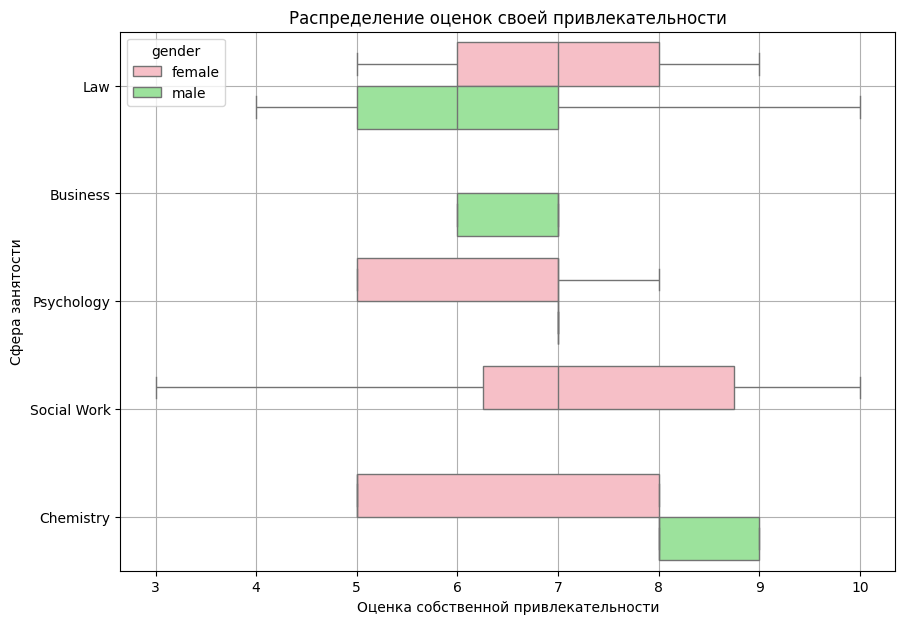

In [13]:
fig = plt.figure(figsize=(10, 7))        # подготавливаем канву для графика

boxplot = sns.boxplot(                   # из библиотеки seaborn (sns) достаем функцию отрисовки ящика с усами
    x = top5field["attractive"],         # по оси X будет оценка свобственной привлекательности
    y = top5field['field'],              # по оси Y будут категории сфер деятельности
    hue = top5field['gender'],           # разобьем ящики с усами на категории м/ж и раскрасим их
    orient='h',                          # ящики будут горизонтальными
    palette={"female": "lightpink",      # указываем, в какие цвета нужно раскрасить м/ж
             "male": "lightgreen"}
)

boxplot.set_title('Распределение оценок своей привлекательности');
boxplot.set_xlabel('Оценка собственной привлекательности');
boxplot.set_ylabel('Сфера занятости');
boxplot.grid()                           # показать сетку

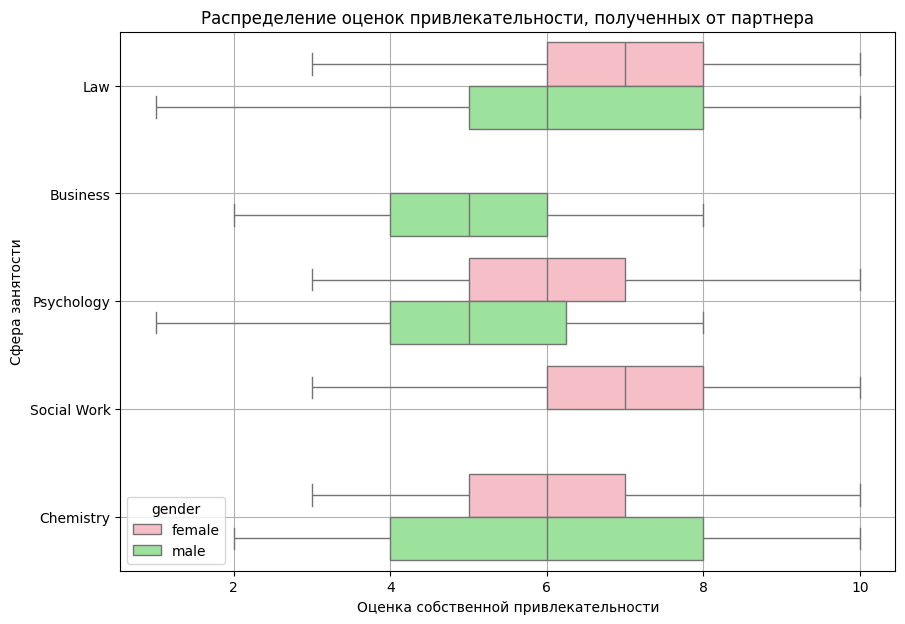

In [14]:
fig = plt.figure(figsize=(10, 7))

boxplot = sns.boxplot(
    x = top5field["attractive_o"],
    y = top5field['field'],
    hue = top5field['gender'],
    orient='h',
    palette={"female": "lightpink", "male": "lightgreen"}
)

boxplot.set_title('Распределение оценок привлекательности, полученных от партнера');
boxplot.set_xlabel('Оценка собственной привлекательности');
boxplot.set_ylabel('Сфера занятости');
boxplot.grid()

А это все ящики с усами по увлечениям.

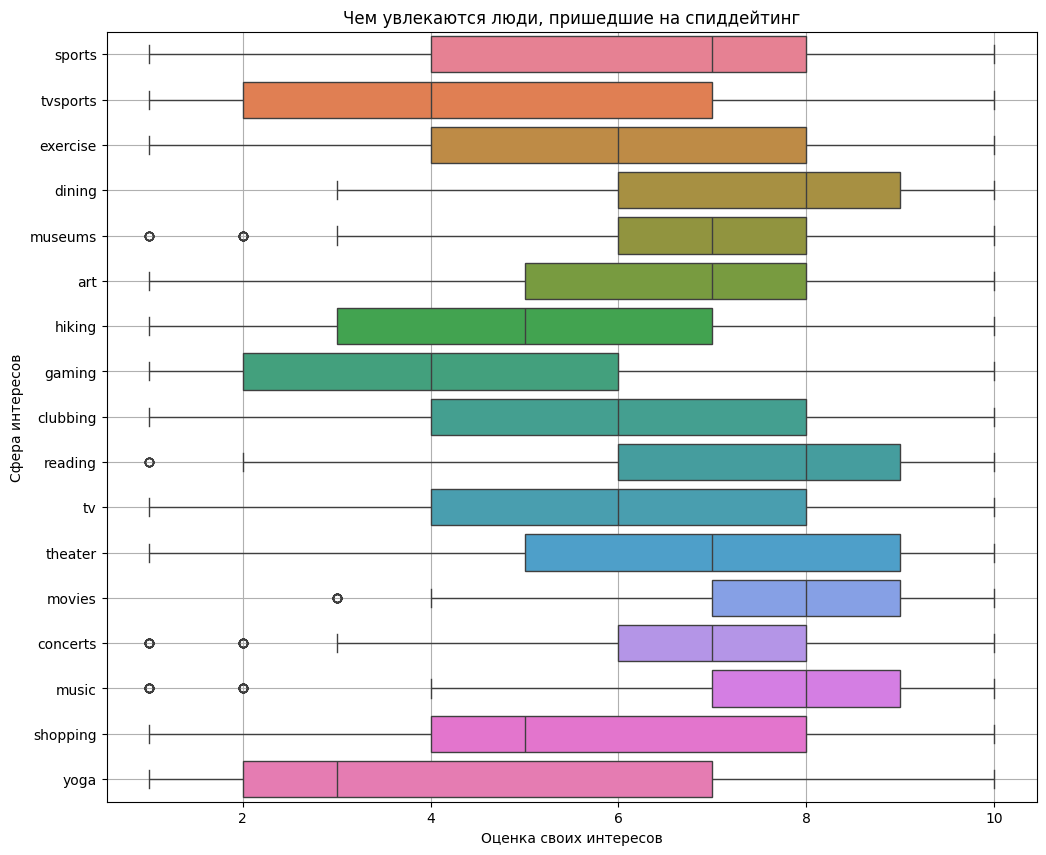

In [15]:
fig = plt.figure(figsize=(12, 10))

boxplot = sns.boxplot(data=df[['gender','sports', 'tvsports', 'exercise', 'dining',
                               'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
                               'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']],
                              orient='h')

boxplot.set_title('Чем увлекаются люди, пришедшие на спиддейтинг');
boxplot.set_xlabel('Оценка своих интересов');
boxplot.set_ylabel('Сфера интересов');
boxplot.grid()

<hr>

### Задание

Выберите любую оценку, которая вас интересует, и постройте ящики с усами, где по оси Х – оценка, по оси Y – топ-5 сфер деятельности, ящики с усами разделены по признаку "мужчина", "женщина". Используйте другие цвета.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         1048 non-null   object 
 1   age                            1048 non-null   int64  
 2   age_o                          1048 non-null   int64  
 3   field                          1048 non-null   object 
 4   pref_o_attractive              1048 non-null   float64
 5   pref_o_sincere                 1048 non-null   float64
 6   pref_o_intelligence            1048 non-null   float64
 7   pref_o_funny                   1048 non-null   float64
 8   pref_o_ambitious               1048 non-null   float64
 9   pref_o_shared_interests        1048 non-null   float64
 10  attractive_o                   1048 non-null   float64
 11  sinsere_o                      1048 non-null   int64  
 12  intelligence_o                 1048 non-null   f

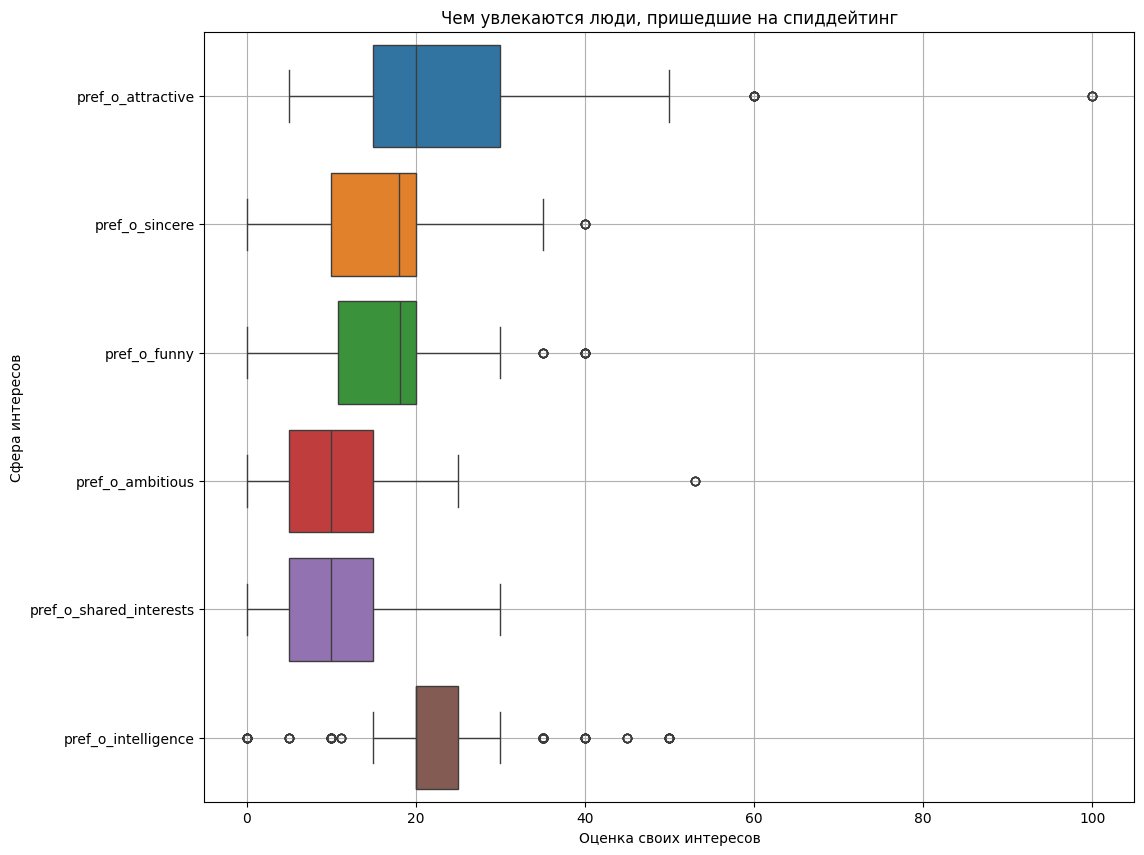

In [17]:
fig = plt.figure(figsize=(12, 10))

boxplot = sns.boxplot(data=df[['pref_o_attractive','pref_o_sincere', 'pref_o_funny', 'pref_o_ambitious',  'pref_o_shared_interests', 'pref_o_intelligence']],
                              orient='h')

boxplot.set_title('Чем увлекаются люди, пришедшие на спиддейтинг');
boxplot.set_xlabel('Оценка своих интересов');
boxplot.set_ylabel('Сфера интересов');
boxplot.grid()

Доступные цвета:

<img src="https://matplotlib.org/stable/_images/sphx_glr_named_colors_003_2_00x.png">

<hr>

## Сводные таблицы

`df.groupby('столбец для группировки (категории)')['столбец для расчета статистик'].статистика()`

In [24]:
df.groupby('gender')['match'].mean() # у скольких женщин и мужчин случился мэтч (в процентах)

gender
female    0.192090
male      0.162476
Name: match, dtype: float64

In [25]:
# у скольких людей случился мэтч (в процентах) в разных сферах
df.groupby('field')['match'].mean().sort_values(ascending=False)

field
Polish                                   1.000000
Art History/Medicine                     0.777778
Masters In Public Administration         0.700000
Sociology                                0.625000
Communications                           0.615385
International Educational Development    0.384615
English                                  0.375000
Mathematical Finance                     0.333333
Elementary/Childhood Education [Ma]      0.333333
Engineering                              0.312500
Mathematics                              0.307692
Mechanical Engineering                   0.307692
Film                                     0.304348
Philosophy                               0.250000
Political Science                        0.235294
Electrical Engineering                   0.222222
German Literature                        0.222222
Law                                      0.201005
Journalism                               0.200000
Economics; Sociology                     0.2

In [26]:
# сколько было людей из этой сферы деятельности и у скольких случился мэтч (в процентах)
# отсортированы в порядке убывания по % и кол-ву людей

df.groupby('field')['match'].agg(['count', 'mean']).sort_values(['mean', 'count'], ascending=False)

,count,mean
field,,
Polish,1,1.000000
Art History/Medicine,9,0.777778
Masters In Public Administration,10,0.700000
Sociology,8,0.625000
Communications,13,0.615385
International Educational Development,13,0.384615
English,8,0.375000
Elementary/Childhood Education [Ma],15,0.333333
Mathematical Finance,12,0.333333


<hr>

### Задание

Постройте сводную таблицу – в рядах должна быть сфера деятельности, в столбце возраст, в ячейках минимальный, средний и максимальный возраст.

In [52]:
# df.groupby('field')['age'].sort_values(['min', 'mean', 'max'], ascending=False)
df.groupby('field')['age'].agg(['min', 'mean', 'max']).sort_values(['min', 'mean', 'max'], ascending=True)

,min,mean,max
field,,,
Biomedical Engineering,18,18,18
Polish,19,19,19
Computer Science,19,22,26
English,20,20,20
Sociology,20,20,20
Applied Maths/Econs,21,21,21
Art History/Medicine,21,21,21
Economics; Sociology,21,21,21
Psychology And English,21,21,21


<hr>

In [30]:
# решение человека, пришедшего на свидание, и средние оценки, поставленные партнерам

df.groupby('decision')[['attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner']].mean().T

decision,0,1
attractive_partner,5.352066,7.338600
sincere_partner,6.952066,7.582393
intelligence_partner,7.246281,7.702032
funny_partner,5.689256,7.279910
ambition_partner,6.603306,7.067720
shared_interests_partner,4.742149,6.370203


In [31]:
# решение партнера, пришедшего на свидание, и средние оценки, поставленные тем, кто пришел

df.groupby('decision_o')[['attractive_o',
       'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o']].mean().T

decision_o,0,1
attractive_o,5.317114,7.390487
sinsere_o,6.879195,7.559735
intelligence_o,7.135067,7.720133
funny_o,5.548658,7.283186
ambitous_o,6.535235,7.154867
shared_interests_o,4.639262,6.457965


In [32]:
# можем еще разбить по полу

df.groupby(['decision_o', 'gender'])[['attractive_o',
       'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o']].mean().T

decision_o                 0                   1          
gender                female      male    female      male
attractive_o        5.648855  5.056886  7.503717  7.224044
sinsere_o           7.038168  6.754491  7.501859  7.644809
intelligence_o      7.211832  7.074850  7.592937  7.907104
funny_o             5.958015  5.227545  7.249071  7.333333
ambitous_o          6.416031  6.628743  7.048327  7.311475
shared_interests_o  4.851145  4.473054  6.360595  6.601093

<hr>

### Задание


Постройте сводную таблицу, в рядах должны быть результаты опросов о важности разных черт партнера (столбцы, начинающиеся с `pref_o`), в колонках – пол, в ячейках минимум, среднее, медиана, максимум значений выбранных черт.

In [18]:
df.columns

Index(['gender', 'age', 'age_o', 'field', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive', 'sincere', 'intelligence', 'funny',
       'ambition', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'expected_num_matches', 'like', 'met', 'decision', 'decision_o',
       'match'],
      dtype='object')

In [55]:
df.groupby('gender')[['pref_o_attractive','pref_o_sincere', 'pref_o_funny',
                        'pref_o_ambitious',  'pref_o_shared_interests',
                        'pref_o_intelligence']].agg(['count','min', 'mean', 'max']).round(2).T

gender                         female    male
pref_o_attractive       count  531.00  517.00
                        min     10.00    5.00
                        mean    28.02   19.32
                        max    100.00   50.00
pref_o_sincere          count  531.00  517.00
                        min      0.00    0.00
                        mean    16.96   16.98
                        max     40.00   32.00
pref_o_funny            count  531.00  517.00
                        min      0.00    0.00
                        mean    17.22   17.43
                        max     40.00   40.00
pref_o_ambitious        count  531.00  517.00
                        min      0.00    0.00
                        mean     6.72   12.81
                        max     53.00   25.00
pref_o_shared_interests count  531.00  517.00
                        min      0.00    0.00
                        mean    10.07   10.61
                        max     30.00   20.00
pref_o_intelligence     count  531.00  517.00
                        min      0.00    5.00
                        mean    21.68   22.84
                        max     35.00   50.00

In [54]:
df.groupby('gender')[['pref_o_attractive','pref_o_sincere', 'pref_o_funny',
                        'pref_o_ambitious',  'pref_o_shared_interests',
                        'pref_o_intelligence']].agg(['count','min', 'mean', 'max']).applymap('{:.0f}'.format).T

gender                        female male
pref_o_attractive       count    531  517
                        min       10    5
                        mean      28   19
                        max      100   50
pref_o_sincere          count    531  517
                        min        0    0
                        mean      17   17
                        max       40   32
pref_o_funny            count    531  517
                        min        0    0
                        mean      17   17
                        max       40   40
pref_o_ambitious        count    531  517
                        min        0    0
                        mean       7   13
                        max       53   25
pref_o_shared_interests count    531  517
                        min        0    0
                        mean      10   11
                        max       30   20
pref_o_intelligence     count    531  517
                        min        0    5
                        mean      22   23
                        max       35   50

<hr>